# Importing Libraries

Import essential libraries for data manipulation, visualization, and fetching:
- `pandas` for data frames and time series analysis.
- `numpy` for numerical computations.
- `plotly.graph_objects` and `plotly.subplots` for interactive plots.
- `yfinance` to download financial market data.
- `datetime` for handling dtes.


In [41]:
import pandas as pd 
import numpy as np 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import scipy 
# import pandas_datareader as pdr
import yfinance as yf
from datetime import timedelta, datetime
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, KFold
import plotly.graph_objects as go

# Data Fetching and Preparation

Fetch historical market data for S&P 500 and TSX300 using `yfinance`, covering the period from `start_date` to `end_date`. Process this data to extract closing prices and calculate daily percentage changes. Convert these to pandas Series and DataFrames for analysis.


In [42]:
# Set the start and end dates for the data
start_date = '2023-05-19'
end_date = '2023-07-13'

# Fetch the S&P 500 data from Yahoo Finance
sp500_data = yf.download('^GSPC', start=start_date, end=end_date)

# Extract the dates and closing prices from the fetched data
sp500_dates = sp500_data.index
sp500_closing_prices = sp500_data['Close'].values

# Fetch the TSX300 data from Yahoo Finance
tsx300_data = yf.download('^GSPTSE', start=start_date, end=end_date)

# Extract the dates and closing prices from the fetched data
tsx300_dates = tsx300_data.index
tsx300_closing_prices = tsx300_data['Close'].values

# Convert the closing prices to pandas Series
sp500_series = pd.Series(sp500_closing_prices, index=sp500_dates)
tsx300_series = pd.Series(tsx300_closing_prices, index=tsx300_dates)

# Create a dataframe using the closing prices
stock_data_df = pd.DataFrame({'S&P 500': sp500_series, 'S&P 500 Change %': sp500_series.pct_change() * 100,
                   'TSX300': tsx300_series, 'TSX300 Change %': tsx300_series.pct_change() * 100})

# Replace NaN values with 0 using column names
stock_data_df.fillna(0, inplace=True)

# Round all column values to 2 decimal places
stock_data_df = stock_data_df.round(2)

# Set 'S&P 500 Dates' and 'TSX300 Dates' as index levels
stock_data_df.set_index([stock_data_df.index, stock_data_df.index], inplace=True)

# Set index names
stock_data_df.index.names = ['S&P 500 Dates', 'TSX300 Dates']

# Print the dataframe
display(stock_data_df)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,,S&P 500,S&P 500 Change %,TSX300,TSX300 Change %
S&P 500 Dates,TSX300 Dates,,,,
2023-05-19,2023-05-19,4191.98,0.00,20351.1,0.00
2023-05-22,2023-05-22,4192.63,0.02,0.0,0.00
2023-05-23,2023-05-23,4145.58,-1.12,20146.0,-1.01
2023-05-24,2023-05-24,4115.24,-0.73,19927.7,-1.08
2023-05-25,2023-05-25,4151.28,0.88,19774.1,-0.77
2023-05-26,2023-05-26,4205.45,1.30,19920.3,0.74
2023-05-29,2023-05-29,0.00,0.00,19968.0,0.24
2023-05-30,2023-05-30,4205.52,0.00,19739.7,-1.14
2023-05-31,2023-05-31,4179.83,-0.61,19572.2,-0.85


# Portfolio Performance Analysis

Load your portfolio's historical values from a CSV file, converting dates to pandas datetime format. Filter data to match the analysis period and calculate percentage changes to assess portfolio performance over time. Compare these changes with market indices by visualizing data using `plotly`.


In [43]:
# Specify the path to your CSV file
csv_path = 'historicalportfoliovalues_7_14_2023.csv'

# Load the CSV file into a pandas DataFrame
portfolio_df = pd.read_csv(csv_path)

# Convert the 'Date' column to datetime format with the specified format
portfolio_df['Date'] = pd.to_datetime(portfolio_df['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Filter the dataframe to start from 2023-05-19
portfolio_df = portfolio_df[portfolio_df['Date'] >= '2023-05-19']

# Calculate the percentage change from the previous value
portfolio_df['Percentage Change'] = portfolio_df['Value'].pct_change() * 100

# Calculate the percentage change from the initial value of 1000000
portfolio_df['Percentage Change From Initial Capital'] = (portfolio_df['Value'] - 1000000) / 1000000 * 100

# Reorder the columns
portfolio_df = portfolio_df[['Date', 'Value', 'Percentage Change', 'Percentage Change From Initial Capital', 'TradesMade', 'Rank']]

# Replace NaN values with 0 using column names
portfolio_df.fillna(0, inplace=True)

# Round all column values to 2 decimal places
portfolio_df = portfolio_df.round(2)

# Print the updated DataFrame
display(portfolio_df)

,Date,Value,Percentage Change,Percentage Change From Initial Capital,TradesMade,Rank
15,2023-05-19,1001233.60,0.00,0.12,0,0
16,2023-05-20,1001315.89,0.01,0.13,0,0
17,2023-05-21,1001398.19,0.01,0.14,0,0
18,2023-05-22,996974.90,-0.44,-0.30,3,5
19,2023-05-23,994602.30,-0.24,-0.54,3,4
20,2023-05-24,993476.87,-0.11,-0.65,3,4
21,2023-05-25,993731.44,0.03,-0.63,5,5
22,2023-05-26,1004685.97,1.10,0.47,5,3
23,2023-05-27,1004743.26,0.01,0.47,5,3
24,2023-05-28,1004558.90,-0.02,0.46,5,3


# Visualizing Data

Create subplots to visually compare portfolio performance metrics such as percentage change and trades made against market indices. Utilize various `plotly` features to enhance chart readability and information depth.


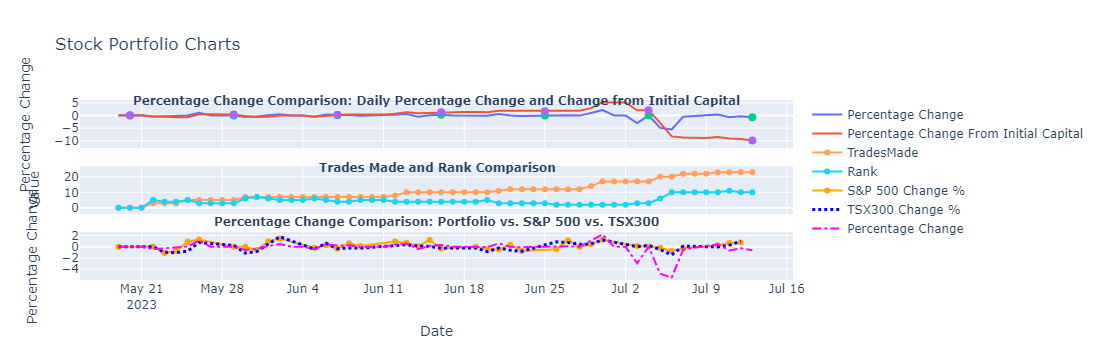

In [44]:
# Create subplots with two rows and one column
fig = make_subplots(rows=3, cols=1, shared_xaxes=True)

# First Plot 
# Add the Percentage Change trace
fig.add_trace(go.Scatter(x=portfolio_df['Date'], 
                         y=portfolio_df['Percentage Change'], 
                         mode='lines',
                         name='Percentage Change'), row=1, col=1)

# Add the Percentage Change From Initial trace
fig.add_trace(go.Scatter(x=portfolio_df['Date'], 
                         y=portfolio_df['Percentage Change From Initial Capital'], 
                         mode='lines',
                         
                         name='Percentage Change From Initial Capital'), row=1, col=1)

# Calculate the interval for data points
interval = len(portfolio_df) // 6

# Add data points for both Percentage Change and Percentage Change From Initial
data_points = portfolio_df.iloc[1::interval]
fig.add_trace(go.Scatter(x=data_points['Date'], y=data_points['Percentage Change'], mode='markers',
                         marker=dict(size=8), showlegend=False), row=1, col=1)

fig.add_trace(go.Scatter(x=data_points['Date'], y=data_points['Percentage Change From Initial Capital'], mode='markers',
                         marker=dict(size=8), showlegend=False), row=1, col=1)


# Second Plot
# Add the TradesMade scatter plot to the second subplot
fig.add_trace(go.Scatter(x=portfolio_df['Date'], y=portfolio_df['TradesMade'],
                         mode='lines+markers', name='TradesMade'), row=2, col=1)

# Add the Rank scatter plot to the second subplot
fig.add_trace(go.Scatter(x=portfolio_df['Date'], y=portfolio_df['Rank'],
                         mode='lines+markers', name='Rank'), row=2, col=1)


# Third Plot 
# Add the S&P 500 Change % trace to the third subplot
fig.add_trace(go.Scatter(x=stock_data_df.index.get_level_values('S&P 500 Dates'), y=stock_data_df['S&P 500 Change %'],
                         mode='lines+markers',line=dict(color='orange'), name='S&P 500 Change %'), row=3, col=1)

# Add the TSX300 Change % trace to the third subplot
fig.add_trace(go.Scatter(x=stock_data_df.index.get_level_values('TSX300 Dates'), y=stock_data_df['TSX300 Change %'],
                         line=dict(dash='dot', color='blue',width=3), name='TSX300 Change %'), row=3, col=1)

# Add the Percentage Change and Date trace to the third subplot
fig.add_trace(go.Scatter(x=portfolio_df['Date'], y=portfolio_df['Percentage Change'],
                         line=dict(dash='dashdot', color='magenta',width=2), name='Percentage Change'), row=3, col=1)




# Set the titles for each subplot
fig.update_layout(title_text="Stock Portfolio Charts",
                  annotations=[
                      dict(text="<b>Percentage Change Comparison: Daily Percentage Change and Change from Initial Capital</b>", x=0.5, y=1.05, xref='paper', yref='paper', showarrow=False),
                      dict(text="<b>Trades Made and Rank Comparison</b>", x=0.5, y=0.68, xref='paper', yref='paper', showarrow=False),
                      dict(text="<b>Percentage Change Comparison: Portfolio vs. S&P 500 vs. TSX300</b>", x=0.5, y=0.27, xref='paper', yref='paper',
                           showarrow=False)
                  ])


# Set the axis labels for each subplot
fig.update_yaxes(title_text="Percentage Change", row=1, col=1)
fig.update_yaxes(title_text="Value", row=2, col=1)
fig.update_xaxes(title_text="Date", row=3, col=1)
fig.update_yaxes(title_text='Percentage Change', row=3, col=1)

# Update the layout and display the figure
fig.update_layout(height=800)
fig.show()


# Performance Metrics Calculation

Calculate key financial metrics to evaluate the portfolio's performance, including the Sharpe Ratio for risk-adjusted returns, and Beta and Alpha for market sensitivity and excess return measurement. This section uses `numpy` for statistical calculations.

In [50]:
# Convert sp500_dates and portfolio_df['Date'] to sets for efficient comparison
sp500_dates_set = set(sp500_dates)
portfolio_dates_set = set(portfolio_df['Date'])

# Find the common dates between sp500_dates and portfolio_df['Date']
common_dates = sp500_dates_set.intersection(portfolio_dates_set)

# Filter excess_returns to include only the common dates
excess_returns_filtered = portfolio_df[portfolio_df['Date'].isin(common_dates)]['Percentage Change From Initial Capital']

# display(portfolio_df['Date'])
# display(sp500_dates)

**Financial Metrics and their Explanations**:

1. **Arithmetic Mean of Daily Returns**: This is the average of the daily percentage changes in the value of the portfolio or stock. It gives an idea of the expected return on an average day.

2. **Standard Deviation of Daily Returns**: This measures the volatility of the daily returns of the portfolio or stock. A higher standard deviation indicates higher volatility, meaning the daily returns can vary significantly from the mean.

3. **Variance of Daily Returns**: This is the square of the standard deviation. It measures the dispersion of the daily returns from the mean, and like standard deviation, it's a measure of risk.

4. **Total Portfolio Return**: This is the overall return of the portfolio over the period under consideration, often expressed as a percentage.

5. **Sharpe Ratio**: This ratio is used to understand the return of an investment compared to its risk. It's calculated by subtracting the risk-free rate from the return of the portfolio and dividing by the standard deviation of the portfolio returns. The higher the Sharpe Ratio, the better the risk-adjusted return.

6. **Alpha**: Alpha is a measure of performance on a risk-adjusted basis. It represents the value that a portfolio manager adds to or subtracts from a fund's return. A positive alpha suggests that the investment has performed better than its beta would predict.

7. **Beta**: This measures the sensitivity of the portfolio returns to the market returns. A beta of 1 means the portfolio's price will move with the market. A beta of less than 1 means that the portfolio will be less volatile than the market, and a beta of more than 1 indicates that the portfolio's price will be more volatile than the market.

In [46]:
# Calculate the excess returns by subtracting the risk-free rate (assumed to be 0 here)
excess_returns = portfolio_df['Percentage Change From Initial Capital']

# One-liner to calculate the percentage of values greater than 0
percentage_greater_than_zero = (excess_returns[excess_returns > 0].count()/len(excess_returns)) * 100

print(f"Percentage of values greater than 0: {percentage_greater_than_zero:.4f}%")

# Calculate the percentage returns for the TSX
tsx_returns = stock_data_df['S&P 500 Change %']

# Calculate the percentage returns for the S&P 500
sp500_returns = stock_data_df['TSX300 Change %']

def filter_excess_returns(date_list):
    # Convert date_list and portfolio_df['Date'] to sets for efficient comparison
    date_set = set(date_list)
    portfolio_dates_set = set(portfolio_df['Date'])

    # Find the common dates between date_list and portfolio_df['Date']
    common_dates = date_set.intersection(portfolio_dates_set)

    # Filter excess_returns to include only the common dates
    excess_returns_filtered = portfolio_df[portfolio_df['Date'].isin(common_dates)]['Percentage Change From Initial Capital']

    return excess_returns_filtered

excess_returns = filter_excess_returns(stock_data_df.index.get_level_values('TSX300 Dates'))

# Define the risk-free rate (assumed to be 0 here)
risk_free_rate = 0

# Calculate the portfolio's average return
portfolio_return = np.mean(excess_returns)

# Calculate the portfolio's standard deviation
portfolio_std_dev = np.std(excess_returns)

# Calculate the portfolio's variance 
var_excess_returns = np.var(excess_returns)

# Calculate the Sharpe Ratio
sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std_dev

# Calculate the covariance between the portfolio returns and the TSX returns
cov_portfolio_tsx = np.cov(excess_returns, tsx_returns)[0, 1]

# Calculate the variance of the TSX returns
var_tsx = np.var(tsx_returns)

excess_returns = filter_excess_returns(stock_data_df.index.get_level_values('S&P 500 Dates'))

# Calculate the covariance between the portfolio returns and the S&P 500 returns
cov_portfolio_sp500 = np.cov(excess_returns, sp500_returns)[0, 1]

# Calculate the variance of the S&P 500 returns
var_sp500 = np.var(sp500_returns)

# Calculate the beta coefficients
beta_tsx = cov_portfolio_tsx / var_tsx
beta_sp500 = cov_portfolio_sp500 / var_sp500

# Calculate the alpha coefficients
alpha_tsx = portfolio_return - risk_free_rate - beta_tsx * (np.mean(tsx_returns) - risk_free_rate)
alpha_sp500 = portfolio_return - risk_free_rate - beta_sp500 * (np.mean(sp500_returns) - risk_free_rate)

# Print the calculated ratios
print("Sharpe Ratio:", round(sharpe_ratio,4))

# Print the calculated beta coefficients
print("Beta (TSX):", round(beta_tsx,4))
print("Beta (S&P 500):", round(beta_sp500,4))

# Print the calculated alpha coefficients
print("Alpha (TSX):", round(alpha_tsx, 4))
print("Alpha (S&P 500):", round(alpha_sp500, 4))

# Print the calculated mean, standard deviation, and variance of the excess returns
print("Mean of Excess Returns:", round(portfolio_return, 4))
print("Standard Deviation of Excess Returns:", round(portfolio_std_dev, 4))
print("Variance of Excess Returns:", round(var_excess_returns, 4))

Percentage of values greater than 0: 67.8571%
Sharpe Ratio: -0.129
Beta (TSX): 0.5174
Beta (S&P 500): 0.6232
Alpha (TSX): -0.5309
Alpha (S&P 500): -0.4234
Mean of Excess Returns: -0.4438
Standard Deviation of Excess Returns: 3.4418
Variance of Excess Returns: 11.8457


# Rolling Performance Metrics

In this section, we calculate rolling performance metrics for the portfolio. This includes a 30-day rolling mean and standard deviation of the portfolio's percentage change. These metrics help in analyzing the trend and volatility of the portfolio returns over time.

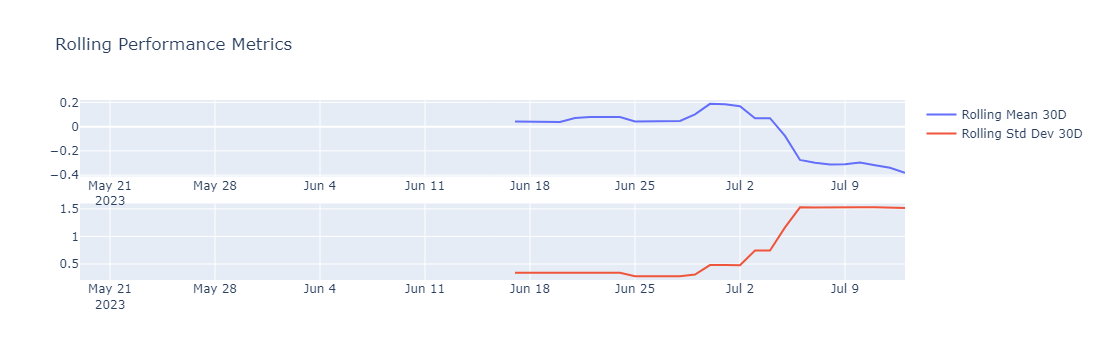

In [47]:
# Calculate rolling mean and standard deviation for a 30-day window
portfolio_df['Rolling Mean 30D'] = portfolio_df['Percentage Change'].rolling(window=30).mean()
portfolio_df['Rolling Std Dev 30D'] = portfolio_df['Percentage Change'].rolling(window=30).std()

# Visualize rolling metrics
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=portfolio_df['Date'], y=portfolio_df['Rolling Mean 30D'], name='Rolling Mean 30D'), row=1, col=1)
fig.add_trace(go.Scatter(x=portfolio_df['Date'], y=portfolio_df['Rolling Std Dev 30D'], name='Rolling Std Dev 30D'), row=2, col=1)
fig.update_layout(height=600, title_text="Rolling Performance Metrics")
fig.show()

# Portfolio Drawdown

Here, we compute the drawdown of the portfolio, which represents the peak-to-trough decline during a specific record period of an investment, fund, or commodity. A drawdown is usually quoted as the percentage between the peak and the subsequent trough.


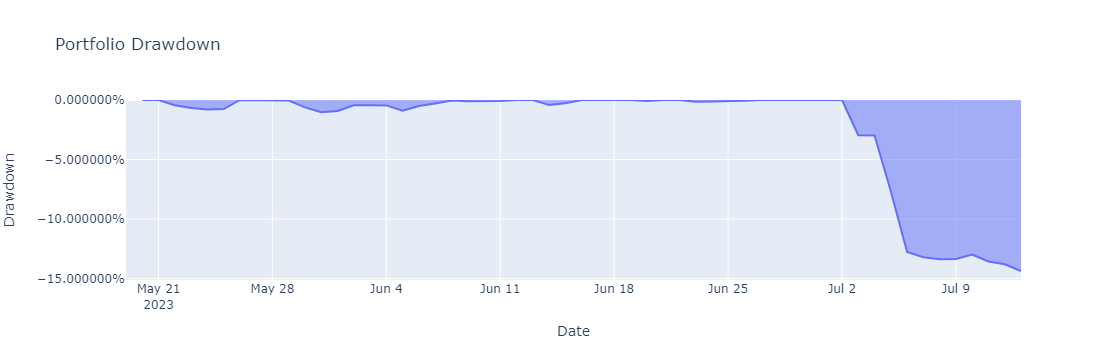

In [48]:
# Calculate daily returns
portfolio_df['Daily Returns'] = portfolio_df['Value'].pct_change()

# Calculate cumulative returns
portfolio_df['Cumulative Returns'] = (1 + portfolio_df['Daily Returns']).cumprod()

# Calculate cumulative max
portfolio_df['Cumulative Max'] = portfolio_df['Cumulative Returns'].cummax()

# Calculate drawdown
portfolio_df['Drawdown'] = portfolio_df['Cumulative Returns'] / portfolio_df['Cumulative Max'] - 1

# Visualize drawdown
fig = go.Figure()
fig.add_trace(go.Scatter(x=portfolio_df['Date'], y=portfolio_df['Drawdown'], fill='tozeroy', name='Drawdown'))
fig.update_layout(title='Portfolio Drawdown', xaxis_title='Date', yaxis_title='Drawdown', yaxis_tickformat='%', height=400)
fig.show()


# Predictive Analytics

This section is dedicated to building a predictive model for future portfolio values. We use the dates of the portfolio's values, convert them to ordinal numbers, and apply polynomial features to our linear regression model. This allows us to predict future returns and visualize potential future trends in the portfolio's performance.

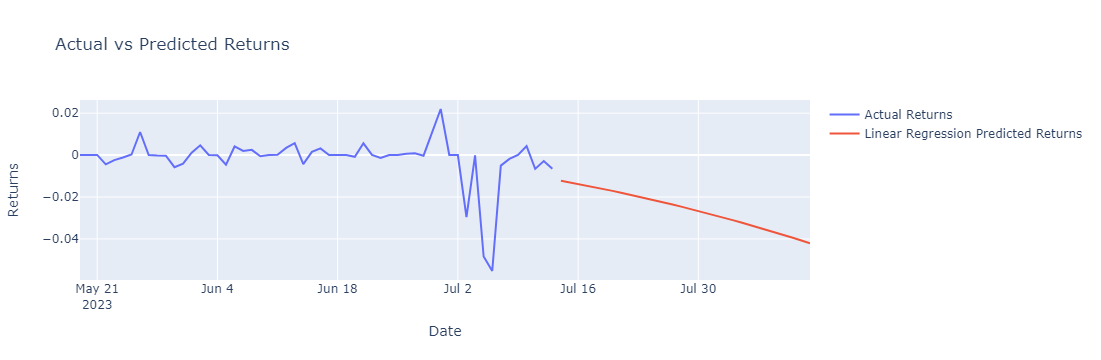

In [49]:
# Convert dates to ordinal to be used in the model
portfolio_df['Date_ordinal'] = portfolio_df['Date'].map(datetime.toordinal)

# Prepare the data for the model
X = portfolio_df['Date_ordinal'].values.reshape(-1, 1)  # Features
y = portfolio_df['Value'].pct_change().fillna(0).values  # Target

# Find the best degree for polynomial features
best_degree = 1
best_score = float('-inf')
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for degree in range(1, 5):
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    scores = cross_val_score(poly_model, X, y, cv=kf, scoring='neg_mean_squared_error')
    score = scores.mean()
    if score > best_score:
        best_degree = degree
        best_score = score

# Use the best degree to create polynomial features
poly_features = PolynomialFeatures(degree=best_degree)
X_poly = poly_features.fit_transform(X)

# Fit the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_poly, y)

# Predict future returns using the Linear Regression model
future_days = 30
last_ordinal = X[-1, 0]
future_X = np.arange(last_ordinal + 1, last_ordinal + 1 + future_days).reshape(-1, 1)
future_X_poly = poly_features.transform(future_X)
lr_predicted_returns = lr_model.predict(future_X_poly)

# Convert 'future_X' from ordinal back to actual dates for plotting
future_dates = [datetime.fromordinal(int(ordinal)) for ordinal in future_X.flatten()]

# Plot the results
fig = go.Figure()
fig.add_trace(go.Scatter(x=portfolio_df['Date'], y=y, mode='lines', name='Actual Returns'))
fig.add_trace(go.Scatter(x=future_dates, y=lr_predicted_returns, mode='lines', name='Linear Regression Predicted Returns'))

fig.update_layout(title='Actual vs Predicted Returns', xaxis_title='Date', yaxis_title='Returns', height=600)
fig.show()
